# ChromaDB: A Comprehensive Guide
This guide introduces ChromaDB, a powerful vector database, through a step-by-step tutorial covering setup, data management, querying, and advanced use cases using a custom dataset.

## 1. Installation

To install ChromaDB, use the following command:

In [ ]:
!pip install chromadb

## 2. Importing ChromaDB & packages

Import ChromaDB into your Python environment:

In [ ]:
import chromadb

In [ ]:
from pprint import pprint # pretty prints

In [ ]:
import numpy as np # for the random generation of a vector

## 3. Creating a ChromaDB Client

ChromaDB offers three types of clients:

1. **Ephemeral Client**: Stores data temporarily in memory, useful for short-term tasks.

In [ ]:
chroma_client = chromadb.Client()

2. **Persistent Client**: Saves data to disk for longer-term storage.

In [ ]:
# chroma_client = chromadb.PersistentClient(path='/content/chroma')

3. **HTTP Client**: Connects to a remote instance via HTTP.

In [ ]:
# chroma_client = chromadb.HttpClient(host='localhost', port=8000)

For simplicity, we’ll use the **Ephemeral Client** in this guide.

## 4. Creating a Collection with Configuration
When creating a collection, you can configure various settings to optimize performance and define how the data is structured. Here’s a script that creates a collection with advanced configuration:

### Explanation of Configuration Parameters:

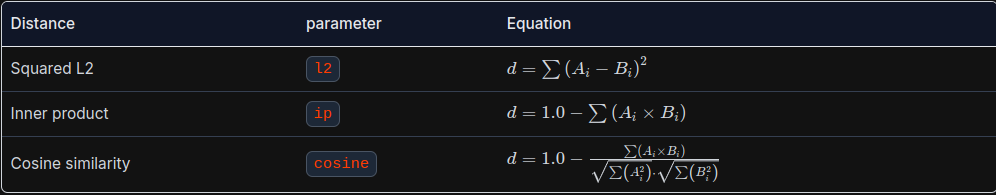

1. **`name`**: The name you assign to the collection. It's how you reference the collection within ChromaDB.
2. **`metadata`**: Additional information about the collection that helps you manage it, like description or creation timestamp.
3. **`embedding_function`**: Defines the function used to convert your data into vector embeddings. ChromaDB uses the **AllMiniLM** transformer by default as the attribute is not explicitly stated, which is ideal for generating semantic representations of text.
4. **HNSW Configuration**: These parameters control how the vector index is built and searched:
   - **`hnsw:space`**: Defines the similarity function:
     - `cosine` (default): Measures the cosine of the angle between vectors (ideal for text and semantic data).
     - `l2`: Measures the Euclidean distance between vectors.
     - `ip`: Uses the inner product between vectors.
   - **`hnsw:construction_ef`**: Controls the size of the candidate list during index creation:
     - Higher values (e.g., 200) improve accuracy but require more memory and construction time.
     - Lower values speed up construction but might reduce accuracy.
   - **`hnsw:search_ef`**: Controls the size of the candidate list used when searching for nearest neighbors:
     - Higher values (e.g., 150) improve search accuracy by examining more potential neighbors.
     - Lower values speed up search but may miss relevant results.
   - **`hnsw:M`**: Defines how many neighbors each node can have in the graph:
     - Higher values (e.g., 32) create a denser graph, improving recall and accuracy but increasing memory and computation.
     - Lower values (e.g., 16) create a sparser graph, using less memory but sacrificing some search accuracy.

In [ ]:
from datetime import datetime

collection = chroma_client.create_collection(
    name='my_collection',
    metadata={
        'description': 'A sample diverse dataset',
        'created': str(datetime.now()),
        'hnsw:space': 'cosine',
        'hnsw:construction_ef': 100,
        'hnsw:search_ef': 100,
        'hnsw:M': 32
    }
)

## 5. Preparing a Dataset

Let’s create a dataset with words, metadata, and IDs. This will help demonstrate various use cases effectively:

In [ ]:
data = {
    'documents': ['apple', 'banana', 'cherry', 'car', 'truck', 'bicycle',
                  'dog', 'cat', 'hamster', 'tree', 'flower', 'mountain',
                  'laptop', 'smartphone', 'television', 'song', 'poem', 'novel',
                  'ocean', 'river', 'lake', 'piano', 'guitar', 'drum'],
    'metadatas': [
        {'type': 'fruit', 'category': 'food'},
        {'type': 'fruit', 'category': 'food'},
        {'type': 'fruit', 'category': 'food'},
        {'type': 'vehicle', 'category': 'transport'},
        {'type': 'vehicle', 'category': 'transport'},
        {'type': 'vehicle', 'category': 'transport'},
        {'type': 'animal', 'category': 'pet'},
        {'type': 'animal', 'category': 'pet'},
        {'type': 'animal', 'category': 'pet'},
        {'type': 'plant', 'category': 'nature'},
        {'type': 'plant', 'category': 'nature'},
        {'type': 'landscape', 'category': 'nature'},
        {'type': 'electronics', 'category': 'technology'},
        {'type': 'electronics', 'category': 'technology'},
        {'type': 'electronics', 'category': 'technology'},
        {'type': 'art', 'category': 'music'},
        {'type': 'art', 'category': 'literature'},
        {'type': 'art', 'category': 'literature'},
        {'type': 'water', 'category': 'nature'},
        {'type': 'water', 'category': 'nature'},
        {'type': 'water', 'category': 'nature'},
        {'type': 'instrument', 'category': 'music'},
        {'type': 'instrument', 'category': 'music'},
        {'type': 'instrument', 'category': 'music'}
    ],
    'ids': ['1', '2', '3', '4', '5', '6',
            '7', '8', '9', '10', '11', '12',
            '13', '14', '15', '16', '17', '18',
            '19', '20', '21', '22', '23', '24']
}

## 6. Adding Data to the Collection

Now, add the dataset to the collection (Additionally, you will notice a download popping up, it is for the AI model that transforms words into vectors, which means text embedding. The model is named `all-MiniLM-L6-v2`):

In [ ]:
collection.add(
    documents=data['documents'],
    metadatas=data['metadatas'],
    ids=data['ids']
)

## 7. Viewing Collection Data

### Peek
Display the first 10 items in the collection:

In [ ]:
pprint(collection.peek())

### Count
Get the total number of items in the collection:

In [ ]:
print(collection.count())

## 8. Querying the Collection

### Query by Text
Find similar items based on a text query:

- **`query_texts`**: This is where you provide the list of text queries you want to search for. In this case, `'guitar'` is the query.
  
- **`n_results`**: This specifies how many results you want to retrieve. Here, we’re asking for 3 results that are most similar to the provided query text.

- **`include`**: This is a list that determines which parts of the results to include. You can choose from:
  - **`"documents"`**: Retrieves the original text (or document).
  - **`"embeddings"`**: Retrieves the vector representation of the text.
  - **`"metadatas"`**: Retrieves the metadata associated with the document.
  - **`"distances"`**: Retrieves the distance (or similarity score) between the query and the retrieved items.


In [ ]:
results = collection.query(
    query_texts=['guitar'],
    n_results=3,
    include=["embeddings", "documents", "metadatas", "distances"]
)
pprint(results)

### Query with Metadata Filters
Search with metadata to filter results:

In [ ]:
results = collection.query(
    query_texts=['nature'],
    n_results=5,
    where={'category': 'nature'},
    include=["embeddings", "documents", "metadatas", "distances"]
)
pprint(results)

### Query by Embeddings
Use vector embeddings for search:

In [ ]:
results = collection.query(
    query_embeddings=[np.random.rand(384)], # dimension 384 is the same as our embedding model output, which means words are transformed to 384 dimensional vectors
    n_results=3,
    include=["embeddings", "documents", "metadatas", "distances"]
)
pprint(results)

## 9. Updating and Deleting Data

### Update or Upsert
Add or update data in the collection (the key difference between `upsert` and `update` is that an upsert operation updates existing items, or adds them if they don't yet exist):

In [ ]:
collection.upsert(
    documents=['keyboard'],
    metadatas=[{'type': 'instrument', 'category': 'music'}],
    ids=['25']
)

In [ ]:
collection.update(
    metadatas=[{'type': 'instrument', 'category': 'coding'}],
    ids=['25']
)

### Delete
Remove specific data by ID or metadata:

In [ ]:
collection.delete(ids=['1', '2'])
collection.delete(where={'type': 'fruit'})

## 10. Wrapping Up

This guide introduced ChromaDB with a focus on setup, collection management, and querying, alongside an explanation of how HNSW configuration parameters can be used to optimize the vector search process. By following these steps, you can easily manage and query your own datasets, making use of the powerful capabilities of ChromaDB for semantic search and other use cases.